<h1>MIDTERMS EXAM HANDSON</h1>
<hr>

<h2>Analyst: Raeven Maranan</h2>

In [76]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap
from matplotlib.ticker import MaxNLocator


In [77]:
chcgo=pd.read_csv('chicago_2001_present.csv')

<h1>DATAFRAME SUMMARY </h1>
<hr>

In [78]:
chcgo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410198 entries, 0 to 8410197
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [79]:
chcgo.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.410198e+06,8.410198e+06,8.410151e+06,7.795376e+06,7.796511e+06,8.316513e+06,8.316513e+06,8.410198e+06,8.316513e+06,8.316513e+06
mean,7.506417e+06,1.183592e+03,1.129624e+01,2.278485e+01,3.738321e+01,1.164655e+06,1.885910e+06,2.010984e+03,4.184253e+01,-8.767129e+01
std,3.776056e+06,7.037035e+02,6.963286e+00,1.385829e+01,2.154697e+01,1.695337e+04,3.243238e+04,7.057827e+00,8.923247e-02,6.143601e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,4.057425e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153071e+06,1.859206e+06,2.005000e+03,4.176894e+01,-8.771335e+01
50%,7.505136e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166207e+06,1.891022e+06,2.010000e+03,4.185656e+01,-8.766556e+01
75%,1.089433e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176401e+06,1.909404e+06,2.017000e+03,4.190708e+01,-8.762807e+01
max,1.398087e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.025000e+03,4.202291e+01,-8.752453e+01


<h1>FILL NULL VALUES </h1>
<hr>

In [80]:
chcgo.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [26]:
df_loc = chcgo['Location Description'].mode()[0]
chcgo['Location Description'].fillna(df_loc, inplace=True)
df_dist = chcgo['District'].mode()[0]
chcgo['District'].fillna(df_dist, inplace=True)
df_ward = chcgo['Ward'].mode()[0]
chcgo['Ward'].fillna(df_ward, inplace=True)
df_comm = chcgo['Community Area'].mode()[0]
chcgo['Community Area'].fillna(df_comm, inplace=True)
df_lat = chcgo['Latitude'].mean()
chcgo['Latitude'].fillna(df_lat, inplace=True)
df_long = chcgo['Longitude'].mean()
chcgo['Longitude'].fillna(df_long, inplace=True)
df_x = chcgo['X Coordinate'].mean()
chcgo['X Coordinate'].fillna(df_x, inplace=True)
df_y = chcgo['Y Coordinate'].mean()
chcgo['Y Coordinate'].fillna(df_y, inplace=True)
chcgo['Location'].fillna('...', inplace=True)
chcgo.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
DayOfWeek               0
Hour                    0
dtype: int64

In [81]:
chcgo['Date'] = pd.to_datetime(chcgo['Date'], errors='coerce')
chcgo['Year'] = chcgo['Date'].dt.year
chcgo['Month'] = chcgo['Date'].dt.month
chcgo['DayOfWeek'] = chcgo['Date'].dt.day_name()
chcgo['Hour'] = chcgo['Date'].dt.hour
chcgo.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
Month                        0
DayOfWeek                    0
Hour                         0
dtype: int64

<h1>QUESTIONS AND INSIGHTS </h1>
<hr>

<h1>1.)Which year recorded the highest number of crimes? </h1>

In [82]:
chcgo['Year'].value_counts()

Year
2002    486830
2001    485954
2003    475996
2004    469439
2005    453785
2006    448198
2007    437105
2008    427211
2009    392859
2010    370555
2011    352039
2012    336367
2013    307603
2014    275866
2016    269930
2017    269259
2018    269105
2015    264867
2023    263119
2019    261648
2024    258688
2022    239911
2020    212643
2021    209571
2025    171650
Name: count, dtype: int64

In [83]:
yrh = chcgo['Year'].value_counts().sort_index()
yrh.nlargest(1)

Year
2002    486830
Name: count, dtype: int64

<h1>insight 1 </h1>
<p>according to the data set, the year with the highest crime count is the year 2002</p>

<h1>insight 2 </h1>
<p>this indicates that in 2002 numerous incidents peaked</p>

<h1>2.)Which year recorded the lowest number of crimes? </h1>

In [84]:
yrl = chcgo['Year'].value_counts().sort_index()
yrl.nsmallest(1)

Year
2025    171650
Name: count, dtype: int64

<h1>insight 3 </h1>
<p>according to the data set, the year with the lowest crime count is the year 2025</p>

<h1>insight 4 </h1>
<p>this is because this is the current year we are on, meaning the crime counts are still counting and or the current sytem has been changed lessening the ammount of incidents to happen in chicago</p>

<h1>3.)What are the top 5 crime types in Chicago? </h1>

In [85]:
chcgo['Primary Type'].value_counts()

Primary Type
THEFT                                1785150
BATTERY                              1532491
CRIMINAL DAMAGE                       956346
NARCOTICS                             763342
ASSAULT                               563123
OTHER OFFENSE                         524325
BURGLARY                              444757
MOTOR VEHICLE THEFT                   429681
DECEPTIVE PRACTICE                    387055
ROBBERY                               314286
CRIMINAL TRESPASS                     226310
WEAPONS VIOLATION                     124642
PROSTITUTION                           70405
OFFENSE INVOLVING CHILDREN             60359
PUBLIC PEACE VIOLATION                 54729
SEX OFFENSE                            34126
CRIM SEXUAL ASSAULT                    27290
INTERFERENCE WITH PUBLIC OFFICER       20176
LIQUOR LAW VIOLATION                   15377
GAMBLING                               14663
ARSON                                  14396
HOMICIDE                               139

In [86]:
top5 = chcgo['Primary Type'].value_counts().head(5)
top5

Primary Type
THEFT              1785150
BATTERY            1532491
CRIMINAL DAMAGE     956346
NARCOTICS           763342
ASSAULT             563123
Name: count, dtype: int64

<h1>insight 5 </h1>
<p>according to the data set, the top 5 common crime types are:THEFT,BATTERY, CRIMINAL, DAMAGE,  NARCOTICS, and ASSAULT </p>

<h1>insight 6 </h1>
<p> this also show that property crimes are frequent crimes that are committed in chicago </p>

<h1>4.) Which crime type is the least common in the dataset? </h1>

In [87]:
crime = chcgo['Primary Type'].value_counts().tail(1)
crime

Primary Type
DOMESTIC VIOLENCE    1
Name: count, dtype: int64

<h1>insight 7 </h1>
<p>according to the data set, the top 5 leats common crime type is DOMESTIC VIOLENCE </p>

<h1>5.) How many theft cases were reported in 2019? </h1>

In [88]:
theft_19 = chcgo[(chcgo['Year']==2019) & (chcgo['Primary Type']=='THEFT')].shape[0]
theft_19

62499

<h1>insight 8 </h1>
<p>according to the data set, during the year 2019 around 62499 theft cases were reported </p>

<h1>insight 9 </h1>
<p> this shows that it is needed to bebetter property protection measure in order to prevent theft</p>

<h1>6.)Which month has the highest number of reported crimes? </h1>

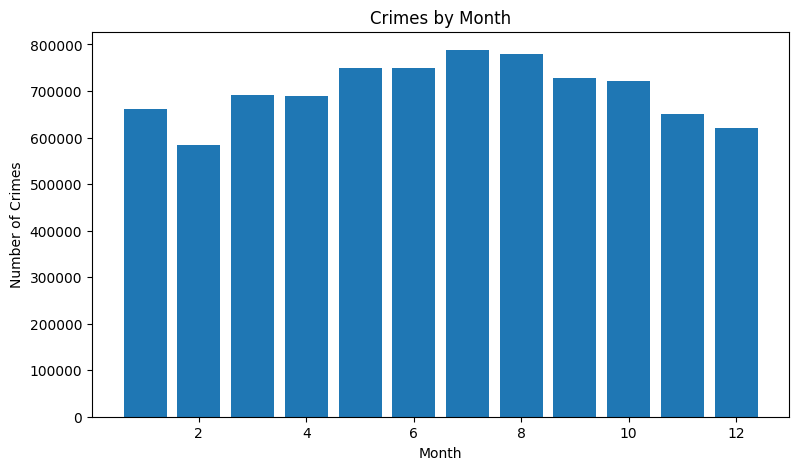

np.int32(7)

In [89]:
monthly_counts = chcgo['Month'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(9,5))
ax.bar(monthly_counts.index, monthly_counts.values)
ax.set_title('Crimes by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Crimes')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
monthly_counts.idxmax()

<h1>insight 10 </h1>
<p> accordin to this data set, the month of july has the highest number of reported cases</p>

<h1>insight 11 </h1>
<p> this tells that summer month in chicago usually has higher crime numbers </p>

<h1>7.)Which day of the week has the most crimes? </h1>

In [90]:
chcgo['DayOfWeek'].value_counts()

DayOfWeek
Friday       1261341
Wednesday    1208169
Saturday     1206357
Tuesday      1200628
Thursday     1196290
Monday       1189517
Sunday       1147896
Name: count, dtype: int64

In [91]:
dow_counts = chcgo['DayOfWeek'].value_counts()
dow_counts.idxmax()

'Friday'

<h1>insight 12 </h1>
<p> accordin to this data set, friday is the day of the week that has the most crimes</p>

<h1>insight 13 </h1>
<p>this is probably because the weekends have increased social activities</p>

<h1>8.) How many arrests vs non-arrests were there in 2020?</h1>

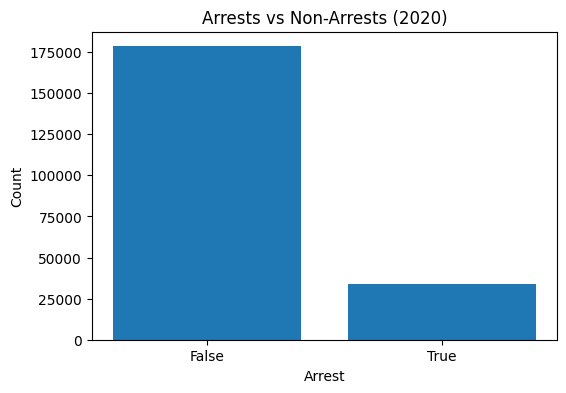

Arrest
False    178448
True      34195
Name: count, dtype: int64

In [92]:
data2020 = chcgo[chcgo['Year']==2020]['Arrest'].value_counts()
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(data2020.index.astype(str), data2020.values)
ax.set_title('Arrests vs Non-Arrests (2020)')
ax.set_xlabel('Arrest')
ax.set_ylabel('Count')
plt.show()
data2020

<h1>insight 14 </h1>
<p> according to this data set, threre were 34195 arrests and 178448 non-arrest that happened during the year 2020 </p>

<h1>insight 15 </h1>
<p> this mean that the other cases sould still be ongoing or left unresolved </p>

<h1>9.)Which location has the highest number of crime reports? </h1>

In [93]:
chcgo['Location Description'].value_counts()

Location Description
STREET                    2197287
RESIDENCE                 1381812
APARTMENT                  998492
SIDEWALK                   761765
OTHER                      269939
                           ...   
JUNK YARD/GARBAGE DUMP          1
LIVERY AUTO                     1
FUNERAL PARLOR                  1
POLICE FACILITY                 1
LOADING DOCK                    1
Name: count, Length: 218, dtype: int64

In [94]:
loch = chcgo['Location Description'].value_counts().idxmax()
loch

'STREET'

<h1>insight 16 </h1>
<p> according to this data set, streets has the highest no. of crime reports </p>

<h1>insight 17 </h1>
<p> meanning that public spaces are often places with high-risk of crime </p>

<h1>insight 18 </h1>
<p> increased or better safety measures can help in reducing these incidents </p>

<h1>10.)What are the top 5 locations where crimes occur? </h1>

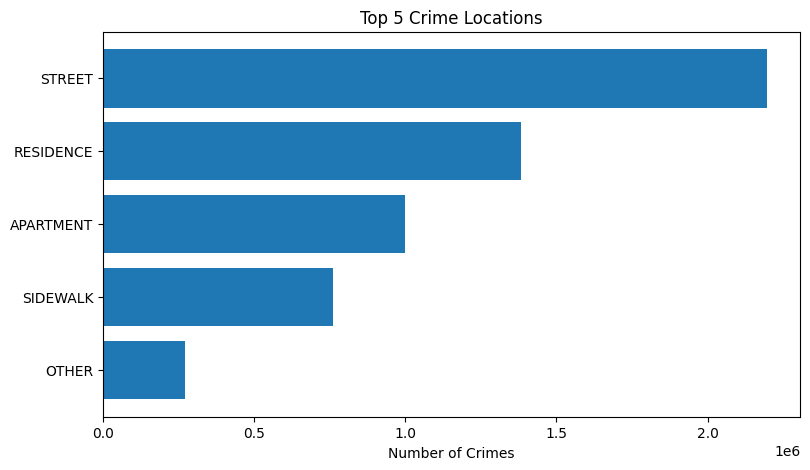

Location Description
STREET       2197287
RESIDENCE    1381812
APARTMENT     998492
SIDEWALK      761765
OTHER         269939
Name: count, dtype: int64

In [95]:
loc_top5 = chcgo['Location Description'].value_counts().head(5)
fig, ax = plt.subplots(figsize=(9,5))
ax.barh(loc_top5.index[::-1], loc_top5.values[::-1])
ax.set_title('Top 5 Crime Locations')
ax.set_xlabel('Number of Crimes')
plt.show()
loc_top5

<h1>insight 19 </h1>
<p> according to this data set, top 5 places that crimes occurs are: STREET, RESIDENCE, APARTMENT, SIDEWALK, and OTHER areas  </p>

<h1>11.)What is the most common crime in residences? </h1>

In [96]:
res_top = chcgo[chcgo['Location Description'].str.upper().str.contains('RESID', na=False)]['Primary Type'].value_counts().head(1)
res_top

Primary Type
BATTERY    381657
Name: count, dtype: int64

<h1>insight 20 </h1>
<p> according to this data set, battery is the most common crime in residences </p>

<h1>insight 21 </h1>
<p> this tells that domestic and property crimes frequently occur at residences </p>

<h1>12.)How many domestic crimes were reported in 2018? </h1>

In [97]:
dom2018 = chcgo[(chcgo['Year']==2018) & (chcgo.get('Domestic', False)==True)].shape[0]
dom2018

51868

<h1>insight 22</h1>
<p> according to this data set, 51868 domestic crimes were reported in the year 2018  </p>

<h1>13.)Which ward recorded the highest number of crimes? </h1>

In [98]:
chcgo['Ward'].value_counts()

Ward
28.0    356615
42.0    319823
24.0    303242
27.0    299053
2.0     264984
6.0     260601
17.0    257134
20.0    255677
21.0    236170
3.0     235103
16.0    225300
34.0    217532
8.0     216935
7.0     212856
37.0    210999
9.0     204837
15.0    195494
5.0     186430
29.0    179633
4.0     163153
1.0     148391
10.0    135136
26.0    132096
18.0    128033
32.0    127415
25.0    114526
49.0    113539
44.0    110552
46.0    107400
31.0    106266
14.0    105750
11.0    105294
30.0    104533
35.0    101997
23.0     97710
43.0     96933
13.0     94895
12.0     94419
22.0     91473
36.0     85616
41.0     83549
40.0     83429
48.0     81273
47.0     80904
50.0     80874
38.0     80126
45.0     80125
33.0     78206
39.0     73606
19.0     69739
Name: count, dtype: int64

In [99]:
wardh = chcgo['Ward'].value_counts().head(1)
wardh

Ward
28.0    356615
Name: count, dtype: int64

<h1>insight 23</h1>
<p> according to this data set, 28.0 has the highest no. of crimes with 971437 crimes  </p>

<h1>14.)Which are the top 5 wards with the most crimes? </h1>

In [100]:
ward_top5 = chcgo['Ward'].value_counts().head(5)
ward_top5

Ward
28.0    356615
42.0    319823
24.0    303242
27.0    299053
2.0     264984
Name: count, dtype: int64

<h1>insight 24</h1>
<p> according to this data set, the top5 wards with the most crimes are 28.0, 42.0, 24.0, 27.0, and 2.0  </p>

<h1>15.)How many crimes led to arrests in 2015? </h1>

In [101]:
arrest2015 = chcgo[(chcgo['Year']==2015) & (chcgo['Arrest']==True)].shape[0]
arrest2015

70071

<h1>insight 25 </h1>
<p> according to this data set, 70071 crimes led to arrests in the year 2015  </p>

<h1>16.) Which crime type has the highest arrest rate? </h1>

In [102]:
arrest_rate = chcgo.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(1)
arrest_rate

Primary Type
DOMESTIC VIOLENCE    1.0
Name: Arrest, dtype: float64

<h1>insight 26</h1>
<p> according to this data set, domestic violence has the highest arrest rate  </p>

<h1>insight 27</h1>
<p> this shows that violent and possesion crimes also have a high arrest and is easier to investigate  </p>

<h1>17.)Which community areas have the most reported crimes? </h1>

In [103]:
chcgo['Community Area'].value_counts()

Community Area
25.0    479380
8.0     280406
43.0    257135
28.0    242987
23.0    241001
         ...  
74.0     17418
12.0     14569
47.0     11487
9.0       7827
0.0         76
Name: count, Length: 78, dtype: int64

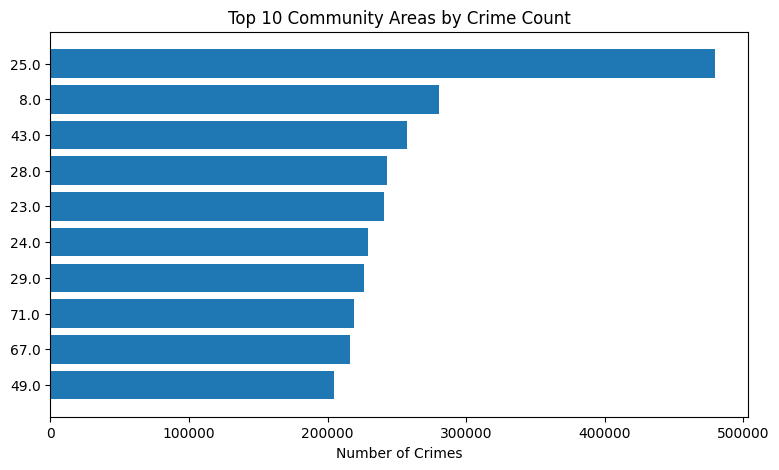

Community Area
25.0    479380
8.0     280406
43.0    257135
28.0    242987
23.0    241001
24.0    229044
29.0    226472
71.0    219263
67.0    216350
49.0    204546
Name: count, dtype: int64

In [104]:
comm_top10 = chcgo['Community Area'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(9,5))
ax.barh(comm_top10.index.astype(str)[::-1], comm_top10.values[::-1])
ax.set_title('Top 10 Community Areas by Crime Count')
ax.set_xlabel('Number of Crimes')
plt.show()
comm_top10

<h1>insight28</h1>
<p> according to this data set, 25.0 has the most reported crimes  </p>

<h1>insight29 </h1>
<p> socials programs should focus on these kinda of communities in order to lessen higher risks of crime </p>

<h1>18.)What are the top 5 crime types in 2020? </h1>

In [105]:
top2020 = chcgo[chcgo['Year']==2020]['Primary Type'].value_counts().head(5)
top2020

Primary Type
BATTERY               41517
THEFT                 41350
CRIMINAL DAMAGE       24882
DECEPTIVE PRACTICE    18588
ASSAULT               18260
Name: count, dtype: int64

<h1>insight 30 </h1>
<p> according to this data set, the top 5 crime types in the year 2020 were:BATTERY, THEFT, CRIMINAL DAMAGE, DECEPTIVE PRACTICE, and ASSAULT </p>

<h1>19.)  How do theft and battery cases compare over the years?</h1>

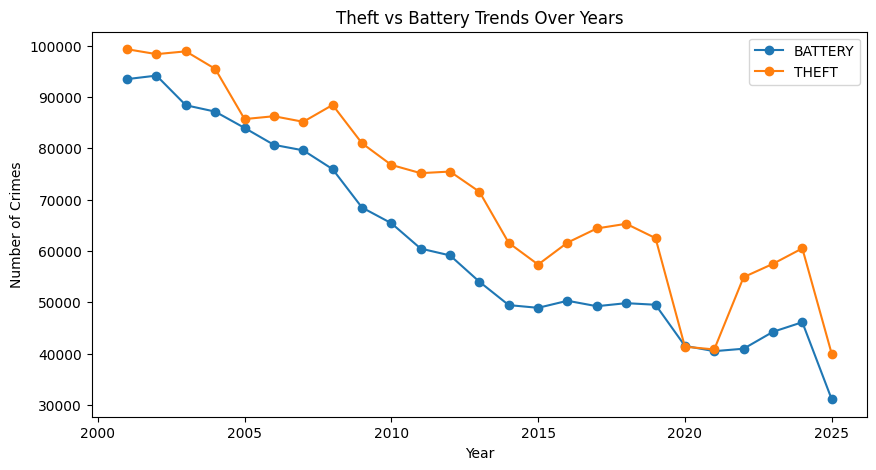

Primary Type,BATTERY,THEFT
Year,,
2021,40483,40821
2022,40962,54899
2023,44249,57492
2024,46124,60504
2025,31125,39992


In [106]:
subset = chcgo[chcgo['Primary Type'].isin(['THEFT','BATTERY'])]
trend = subset.groupby(['Year','Primary Type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10,5))
for col in trend.columns:
    ax.plot(trend.index, trend[col], marker='o', label=col)
ax.set_title('Theft vs Battery Trends Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')
ax.legend()
plt.show()
trend.tail()

<h1>insight 31</h1>
<p> according to this data set, through the years, battery and theft crimes both decreased but still showing that theft is dominant </p>

<h1>20.)In which year did homicides peak? </h1>

In [107]:
homicide_year = chcgo[chcgo['Primary Type'].str.upper().str.contains('HOMICIDE', na=False)]['Year'].value_counts().head(1)
homicide_year

Year
2021    813
Name: count, dtype: int64

<h1>insight </h1>
<p> according to the data set, the year 2021 was the year that homicides peeaked </p>

<h1>21.)How do crimes in alleys compare to those in streets? </h1>

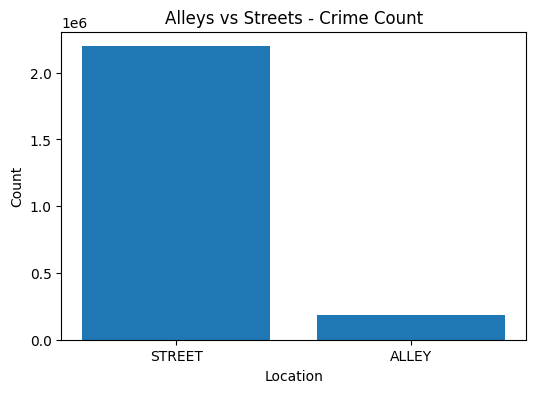

Location Description
STREET    2197287
ALLEY      187348
Name: count, dtype: int64

In [108]:
subset = chcgo[chcgo['Location Description'].isin(['ALLEY','STREET'])]['Location Description'].value_counts()
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(subset.index, subset.values)
ax.set_title('Alleys vs Streets - Crime Count')
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.show()
subset


<h1>insight 32</h1>
<p> according to the data set, though both are public spaces streets still had more crime count than the alleys</p>

<h1>insight33 </h1>
<p> this is usually because streets are more exposed or open that the alleys, but doesnt mean alleys are less dangerous</p>

<h1>22.) What was the most common crime in 2010? </h1>

In [109]:
most2010 = chcgo[chcgo['Year']==2010]['Primary Type'].value_counts().head(1)
most2010

Primary Type
THEFT    76758
Name: count, dtype: int64

<h1>insight 34 </h1>
<p> according to the data set, the most crime in 2010 was theft with 76758 crimes</p>

<h1>23.)Which FBI code appears most frequently in the dataset? </h1>

In [110]:
chcgo['FBI Code'].value_counts()

FBI Code
06     1788058
08B    1316358
14      956346
18      762366
26      604360
08A     575660
05      441849
07      429681
11      334668
03      314286
04B     233308
04A     155267
15      126301
24       73746
16       70405
17       48819
10       47519
02       45400
20       22270
22       15377
19       14956
09       14396
01A      13863
13        3168
12        1685
01B         86
Name: count, dtype: int64

In [111]:
fbi_top = chcgo['FBI Code'].value_counts().head(1)
fbi_top

FBI Code
06    1788058
Name: count, dtype: int64

<h1>insight 35 </h1>
<p> according to the data set, FBI code 06 s the most frequent to appear </p>

<h1>24.)How many crimes occurred near downtown (specifically the latitude 41.85–41.90)? </h1>

In [112]:
downtown_count = chcgo[(chcgo['Latitude']>=41.85)&(chcgo['Latitude']<=41.90)].shape[0]
downtown_count

1966118

<h1>insight 36</h1>
<p> according to the data set, it as around 1966118 crimes  </p>

<h1>25.)What are the average latitude and longitude coordinates of crimes? </h1>

In [113]:
coords_mean = chcgo[['Latitude','Longitude']].mean()
coords_mean

Latitude     41.842530
Longitude   -87.671292
dtype: float64

<h1>insight 37 </h1>
<p> according to the data set, the acerage latitude was 41.842530 while the average longitude was Longitude   -87.671292 </p>